In [8]:
import numpy as np
import matplotlib.pyplot as plt


**ACTIVATION FUNCTIONS**

In [9]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

**USER INPUTS**

In [10]:
x1, x2 = 0.5, 0.8

# Input → Hidden Weights
w_x1h1, w_x2h1 = 0.4, 0.3
w_x1h2, w_x2h2 = 0.2, 0.7

# Hidden → Output Weights
w_h1y, w_h2y = 0.6, 0.9

target = 1.0
lr = 0.1

**VISUALIZE INITIAL CONNECTIVITY**

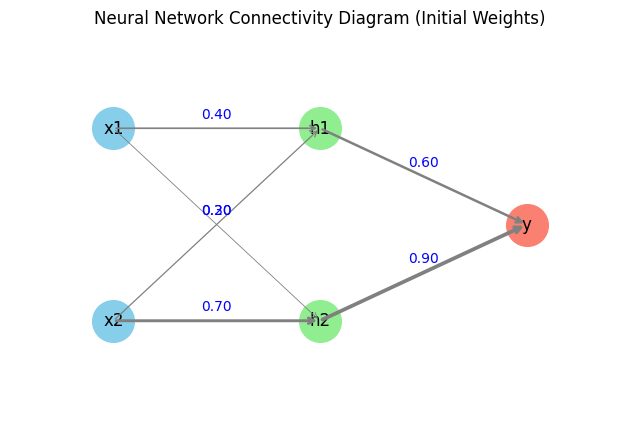

In [11]:
input_pos = {'x1': (0,3), 'x2': (0,1)}
hidden_pos = {'h1': (2,3), 'h2': (2,1)}
output_pos = {'y': (4,2)}

fig, ax = plt.subplots(figsize=(8,5))
ax.axis('off')
ax.set_xlim(-1,5)
ax.set_ylim(0,4)

# Draw nodes
for name, (x,y) in {**input_pos, **hidden_pos, **output_pos}.items():
    ax.plot(x, y, 'o', markersize=30,
            color='skyblue' if name in input_pos else 'lightgreen' if name in hidden_pos else 'salmon')
    ax.text(x, y, name, fontsize=12, ha='center', va='center')

# Draw connections
connections = [
    ('x1','h1', w_x1h1),
    ('x2','h1', w_x2h1),
    ('x1','h2', w_x1h2),
    ('x2','h2', w_x2h2),
    ('h1','y', w_h1y),
    ('h2','y', w_h2y)
]

for src, dst, w in connections:
    x_start, y_start = {**input_pos, **hidden_pos, **output_pos}[src]
    x_end, y_end = {**input_pos, **hidden_pos, **output_pos}[dst]
    ax.annotate("",
                xy=(x_end, y_end),
                xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", lw=w*3, color='gray'))
    xm, ym = (x_start + x_end)/2, (y_start + y_end)/2
    ax.text(xm, ym+0.1, f"{w:.2f}", fontsize=10, color='blue', ha='center')

plt.title("Neural Network Connectivity Diagram (Initial Weights)")
plt.show()

**FORWARD PROPAGATION**

In [12]:
z_h1 = x1 * w_x1h1 + x2 * w_x2h1
z_h2 = x1 * w_x1h2 + x2 * w_x2h2
print(f"z_h1 = {z_h1:.4f}, z_h2 = {z_h2:.4f}")

h1 = sigmoid(z_h1)
h2 = sigmoid(z_h2)
print(f"h1 = {h1:.4f}, h2 = {h2:.4f}")

y = h1 * w_h1y + h2 * w_h2y
loss = 0.5 * (target - y) ** 2
error = y - target
print(f"Output y = {y:.4f}, Target = {target}, Error = {error:.4f}, MSE Loss = {loss:.6f}")

z_h1 = 0.4400, z_h2 = 0.6600
h1 = 0.6083, h2 = 0.6593
Output y = 0.9583, Target = 1.0, Error = -0.0417, MSE Loss = 0.000870


**VISUALIZATIONS STEP 1-4**

Step 1: Hidden Layer Inputs

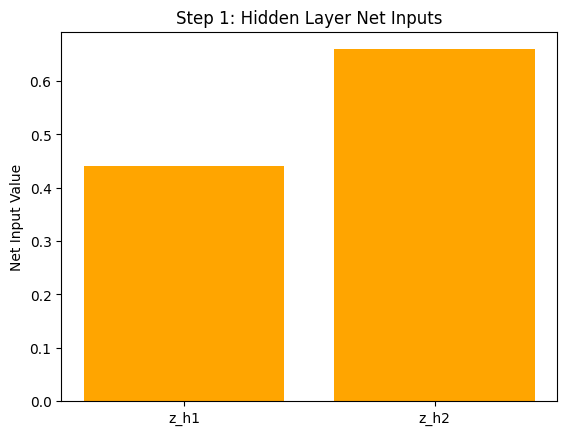

In [13]:
plt.figure()
plt.bar(["z_h1", "z_h2"], [z_h1, z_h2], color='orange')
plt.title("Step 1: Hidden Layer Net Inputs")
plt.ylabel("Net Input Value")
plt.show()

Step 2: Sigmoid Activation

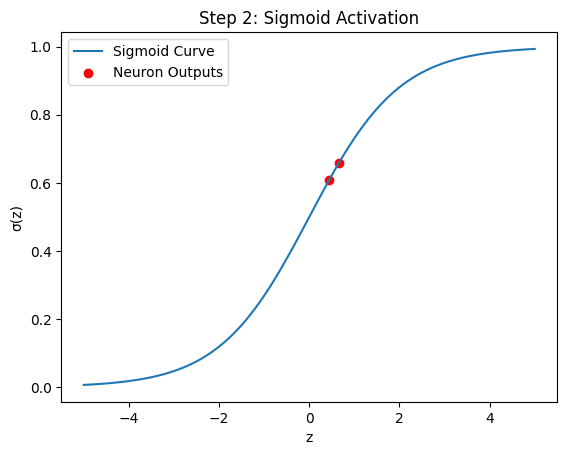

In [14]:
z_vals = np.linspace(-5,5,200)
plt.figure()
plt.plot(z_vals, sigmoid(z_vals), label="Sigmoid Curve")
plt.scatter([z_h1, z_h2], [h1, h2], color="red", label="Neuron Outputs")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Step 2: Sigmoid Activation")
plt.legend()
plt.show()

Step 3: Target vs Predicted

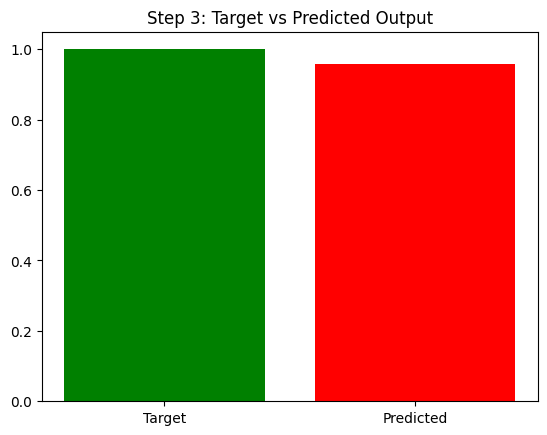

In [15]:
plt.figure()
plt.bar(["Target", "Predicted"], [target, y], color=['green','red'])
plt.title("Step 3: Target vs Predicted Output")
plt.show()

Step 4: MSE Loss

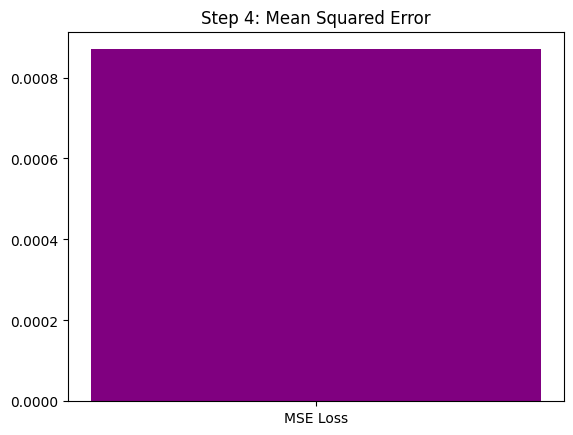

In [16]:
plt.figure()
plt.bar(["MSE Loss"], [loss], color='purple')
plt.title("Step 4: Mean Squared Error")
plt.show()

**BACKPROPAGATION**

In [17]:
grad_w_h1y = error * h1
grad_w_h2y = error * h2
delta_h1 = error * w_h1y * sigmoid_derivative(h1)
delta_h2 = error * w_h2y * sigmoid_derivative(h2)

print(f"Gradient ∂E/∂w_h1y = {grad_w_h1y:.6f}, ∂E/∂w_h2y = {grad_w_h2y:.6f}")
print(f"Hidden deltas: delta_h1 = {delta_h1:.6f}, delta_h2 = {delta_h2:.6f}")

Gradient ∂E/∂w_h1y = -0.025371, ∂E/∂w_h2y = -0.027498
Hidden deltas: delta_h1 = -0.005963, delta_h2 = -0.008433


Step 5: Output Layer Gradients

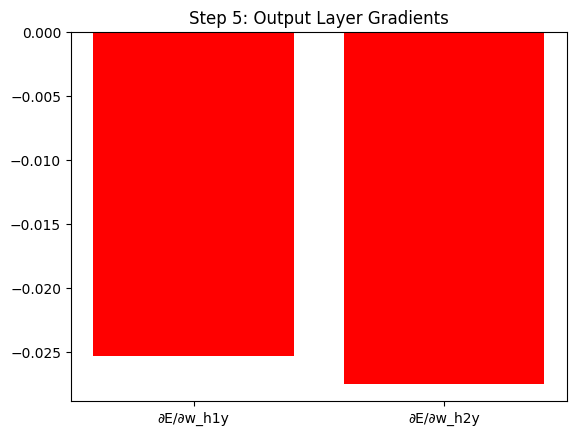

In [18]:
plt.figure()
plt.bar(["∂E/∂w_h1y", "∂E/∂w_h2y"], [grad_w_h1y, grad_w_h2y], color='red')
plt.title("Step 5: Output Layer Gradients")
plt.show()

**WEIGHT UPDATES**

In [19]:
w_h1y_new = w_h1y - lr * grad_w_h1y
w_h2y_new = w_h2y - lr * grad_w_h2y
w_x1h1_new = w_x1h1 - lr * delta_h1 * x1
w_x2h1_new = w_x2h1 - lr * delta_h1 * x2
w_x1h2_new = w_x1h2 - lr * delta_h2 * x1
w_x2h2_new = w_x2h2 - lr * delta_h2 * x2

Step 6: Weight Updates


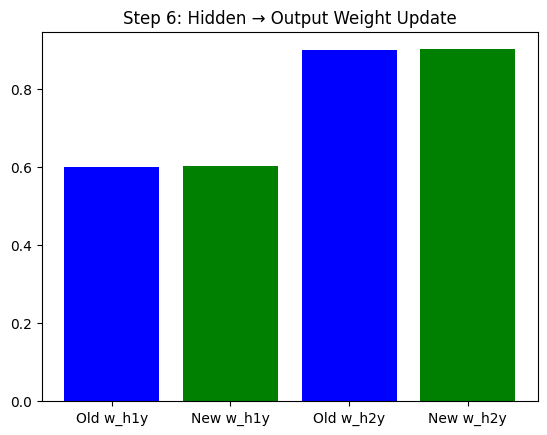

In [20]:
plt.figure()
plt.bar(
    ["Old w_h1y","New w_h1y","Old w_h2y","New w_h2y"],
    [w_h1y,w_h1y_new,w_h2y,w_h2y_new],
    color=['blue','green','blue','green']
)
plt.title("Step 6: Hidden → Output Weight Update")
plt.show()

**FINAL RESULTS**

In [21]:

print("\n========== FINAL RESULTS ==========")
print(f"h1 output = {h1:.4f}")
print(f"h2 output = {h2:.4f}")
print(f"Final output y = {y:.4f}")
print(f"MSE Loss = {loss:.6f}")

print("\n===== UPDATED WEIGHTS =====")
print(f"w_x1h1 = {w_x1h1_new:.4f}")
print(f"w_x2h1 = {w_x2h1_new:.4f}")
print(f"w_x1h2 = {w_x1h2_new:.4f}")
print(f"w_x2h2 = {w_x2h2_new:.4f}")
print(f"w_h1y = {w_h1y_new:.4f}")
print(f"w_h2y = {w_h2y_new:.4f}")

print("\n✅ ONE TRAINING ITERATION COMPLETED SUCCESSFULLY")



========== FINAL RESULTS ==========
h1 output = 0.6083
h2 output = 0.6593
Final output y = 0.9583
MSE Loss = 0.000870

===== UPDATED WEIGHTS =====
w_x1h1 = 0.4003
w_x2h1 = 0.3005
w_x1h2 = 0.2004
w_x2h2 = 0.7007
w_h1y = 0.6025
w_h2y = 0.9027

✅ ONE TRAINING ITERATION COMPLETED SUCCESSFULLY
